In [66]:
from data_tools.query import DBClient
from data_tools.collections import TimeSeries
import datetime
from zoneinfo import ZoneInfo
import numpy as np
import matplotlib.pyplot as plt

In [77]:
tz_van = ZoneInfo("America/Vancouver")

# Local start and end of May 31, 2025
local_start = datetime.datetime(2025, 5, 31, 18, 0, 0, tzinfo=tz_van)
local_end   = datetime.datetime(2025, 5, 31, 23, 59, 59, 999999, tzinfo=tz_van)

# Convert to UTC
utc_start = local_start.astimezone(ZoneInfo("UTC"))
utc_end   = local_end.astimezone(ZoneInfo("UTC"))

In [78]:
client = DBClient()

gps_latitude_df = client.query_series(utc_start, utc_end, "GPSLatitude", "CAN_log")
gps_longitude_df = client.query_series(utc_start, utc_end, "GPSLongitude", "CAN_log")

latitude_threshold = 123.2
longitude_threshold = 49.2

filtered_gps_indices = np.logical_and(gps_longitude_df.GPSLongitude > longitude_threshold, gps_latitude_df.GPSLatitude > latitude_threshold)
filtered_gps_latitude_df = gps_latitude_df.loc[filtered_gps_indices]
filtered_gps_longitude_df = gps_longitude_df.loc[filtered_gps_indices]

gps_latitude = TimeSeries.from_query_dataframe(filtered_gps_latitude_df, 0.25, "GPSLatitude", "")
gps_longitude = TimeSeries.from_query_dataframe(filtered_gps_longitude_df, 0.25, "GPSLongitude", "")

/Users/joshuariefman/Solar/data_analysis/.venv/lib/python3.12/site-packages/data_tools/collections/time_series.py:292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_df['_time'] = pd.to_datetime(query_df['_time'])
/Users/joshuariefman/Solar/data_analysis/.venv/lib/python3.12/site-packages/data_tools/collections/time_series.py:292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_df['_time'] = pd.to_datetime(query_df['_time'])


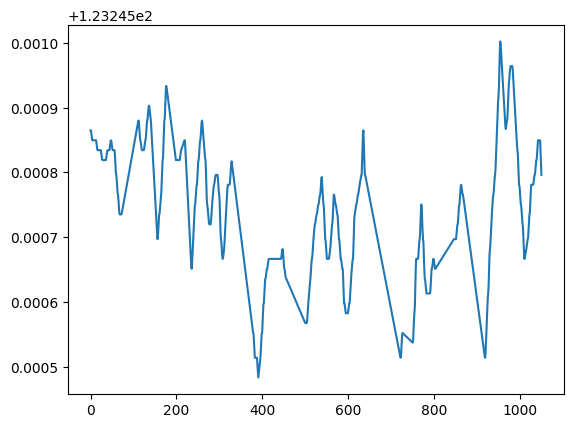

In [79]:
plt.plot(gps_latitude)

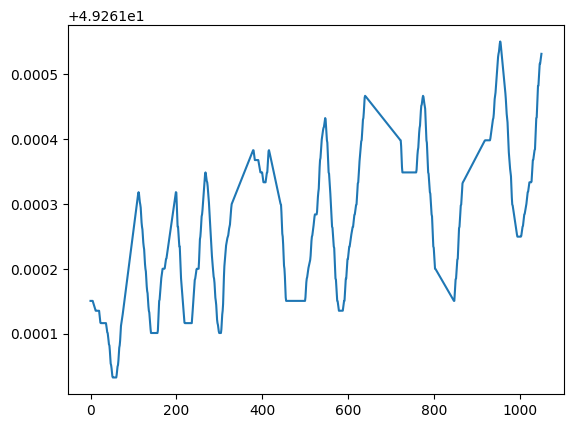

In [80]:
plt.plot(gps_longitude)

In [81]:
import folium

# 1) Suppose you already have two lists (or arrays) of equal length:
#    `lats = [lat1, lat2, lat3, ...]`
#    `lons = [lon1, lon2, lon3, ...]`
#
#    For illustration, here’s a small synthetic example:
lats = gps_longitude
lons = -gps_latitude

# 2) Zip them into a list of (lat, lon) pairs in the order you want the path drawn:
locations = list(zip(lats, lons))
#    locations == [(49.2827, -123.1207),
#                  (49.2830, -123.1210),
#                  (49.2833, -123.1213),
#                  (49.2836, -123.1216),
#                  (49.2839, -123.1219)]

# 3) Create a Folium Map object, centering (and zooming) roughly on the first point:
m = folium.Map(location=locations[0], zoom_start=15)

# 4) Draw the path as a PolyLine:
folium.PolyLine(
    locations=locations,
    weight=4,         # thickness of the line
    color="blue",     # line color
    opacity=0.8
).add_to(m)

# 5) (Optional) If you want to mark each point along the path:
for (lat, lon) in locations:
    folium.CircleMarker(
        location=(lat, lon),
        radius=3,
        color="red",
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# 6) Save the result to an HTML file (or display in a Jupyter notebook):
m.save("path_map.html")
# If you’re in a Jupyter environment, you can instead do:
# display(m)   # (requires `from IPython.display import display`)

print("Map saved to path_map.html")

Map saved to path_map.html
